# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |   Isabela Torres - Septien Uribe |
| **Fecha**      |   25/08/2025  |
| **Expediente** |  730667   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
X = df["TV"].values.reshape(-1,1)
y = df["sales"].values.reshape(-1,1)

In [25]:
matriz = df.to_numpy()

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Si hay relacio entre el presupuesto y la pubilicidad esto nos ayuda a optimizar nuestras ventas


Podemos determinar la mejor estrategia a utilizar y en base a eso decidir en donde invertir nuestro dinero 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Si nos sirve para ver si realmente vale le pena el dinero invertido, además de determinar si nos conviene gastar mas o menos

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [27]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [29]:
b0 = lr.intercept_
b0

array([7.03259355])

In [31]:
b1 = lr.coef_

In [33]:
b0,b1

(array([7.03259355]), array([[0.04753664]]))

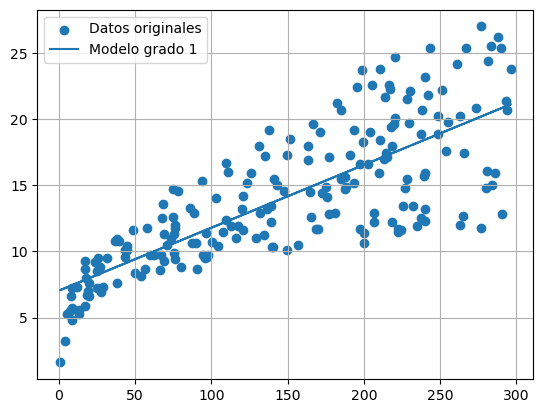

In [35]:
plt.scatter(X, y, label='Datos originales')
plt.plot(X, lr.predict(X), label='Modelo grado 1')
plt.legend()
plt.grid()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La diferencia es que poblacion es el total de individuos, mientras la muestra es un grupo seleccionado con el que hacemos la prueba para analizar y hacer nuestas pruebas estadisticas y de probabilidad

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

La principal diferencia es que si hicieramos los datos con toda la población en primer estancia no habría mucho que sacarle la probabilidad, siendo esta más precisa, sin embargo, esto es inatenible porque costaria demasiado dinero y no siempre se dan los datos o las condiciones para sacar a toda una poblacion. 
Por otro lado cuando de trabaja con una muestra representativa podemos hacerla para determinar que vamos a aplicar en una población. Además de ser más facil de manejar los datos, es mucho más eficiente y en la mayoria de los casos con una muestra es suficiente para tener una gran precision

Si lo hacemos con toda la población esto puede ser impractico,aunque en las estimaciones elimines el error de incertidumbre ya no tendrias que interferir porque ya no habría pruebas de significancia. 

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [37]:
x_bar = np.mean(X)
y_bar = np.mean(y)
n = len(X)
n

200

In [39]:
x_bar

147.0425

In [41]:
y_hat = lr.predict(X)
y_hat

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [45]:
RSS = np.sum((y_hat - y)**2)
RSS

2102.5305831313512

In [47]:
sigma_cuad = RSS/(n-2)
sigma_cuad

10.618841328946218

In [49]:
beta_1 = np.sqrt(sigma_cuad/(((X - x_bar)**2).sum()))
beta_1

0.0026906071877968707

In [51]:
beta_0 = np.sqrt(sigma_cuad * (1/n + (x_bar**2/(((X - x_bar)**2).sum()))))
beta_0

0.4578429402734785

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [53]:
#intervalo de b0
masb0 = b0 + (2*beta_0)
masb0

array([7.94827943])

In [55]:
menosb0 = b0 - (2*beta_0)
menosb0

array([6.11690767])

In [57]:
masb1 = b1 + (2*beta_1)
masb1

array([[0.05291785]])

In [59]:
menosb1 = b1 + (2*beta_1)
menosb1

array([[0.05291785]])

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula es aquella que no pasa nada con el modelo(eso y nada es lo mismo), la hipotesos alternativa es aquella en la que vez un cambio reflejado

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [93]:
p=2

In [95]:
T1 = (b1-0)/beta_1
T1

array([[17.6676256]])

In [97]:
T0 = (b0/beta_0)
T0

array([15.36027517])

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [99]:
from scipy import stats

In [109]:
p_bj0 = 2*(1 - stats.t.cdf(np.abs(T0), n-p))

In [107]:
p_bj1 = 2*(1 - stats.t.cdf(np.abs(T1), n-p))

In [111]:
p_bj0,p_bj1

(array([0.]), array([[0.]]))

¿Se rechaza la hipótesis nula? ¿Qué significa?

Se rechaza la hipotesis nula, Significa que el p value, es 0 por lo tanto la hipotesis nula es etadisticamente insignificante, mostrando una relacion x,y

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [151]:
#regresion lineal Radio
X = df["radio"].values.reshape(-1,1)
y = df["sales"].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X,y)

b0 = lr.intercept_
b1 = lr.coef_
b0,b1

x_bar = np.mean(X)
y_bar = np.mean(y)
n = len(X)

y_hat = lr.predict(X)
y_hat

RSS = np.sum((y_hat - y)**2)

sigma_cuad = RSS/(n-2)

beta_1 = np.sqrt(sigma_cuad/(((X - x_bar)**2).sum()))
beta_0 = np.sqrt(sigma_cuad * (1/n + (x_bar**2/(((X - x_bar)**2).sum()))))

TR1 = (b1-0)/beta_1
TR0 = (b0/beta_0)

pr_bj0 = 2*(1 - stats.t.cdf(np.abs(TR0), n-p))
pr_bj1 = 2*(1 - stats.t.cdf(np.abs(TR1), n-p))

pr_bj0,pr_bj1

(array([0.]), array([[0.]]))

Se rechaza la hipotesis nula, Significa que el p value, es 0 por lo tanto la hipotesis nula es etadisticamente insignificante, mostrando una relacion x,y

In [153]:
#regresion lineal Newspaper
X = df["newspaper"].values.reshape(-1,1)
y = df["sales"].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X,y)

b0 = lr.intercept_
b1 = lr.coef_
b0,b1

x_bar = np.mean(X)
y_bar = np.mean(y)
n = len(X)

y_hat = lr.predict(X)
y_hat

RSS = np.sum((y_hat - y)**2)

sigma_cuad = RSS/(n-2)

beta_1 = np.sqrt(sigma_cuad/(((X - x_bar)**2).sum()))
beta_0 = np.sqrt(sigma_cuad * (1/n + (x_bar**2/(((X - x_bar)**2).sum()))))

TR1 = (b1-0)/beta_1
TR0 = (b0/beta_0)

pn_bj0 = 2*(1 - stats.t.cdf(np.abs(TR0), n-p))
pn_bj1 = 2*(1 - stats.t.cdf(np.abs(TR1), n-p))

pn_bj0,pn_bj1

(array([0.]), array([[0.0011482]]))

Se rechaza la hipotesis nula, Significa que el p value, es 0 por lo tanto la hipotesis nula es etadisticamente insignificante, mostrando una relacion x,y

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [113]:
import statsmodels.api as sm

In [115]:
unos = np.ones([200, 1])

In [121]:
x_tv = df['TV'].values.reshape(-1,1)

In [122]:
x_radio = df['radio'].values.reshape(-1,1)

In [123]:
x_newspaper = df['newspaper'].values.reshape(-1,1)

In [124]:
X2 = np.hstack([unos, x_tv, x_radio, x_newspaper])

In [125]:
X2

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [126]:
ols = sm.OLS(y,X2)

In [127]:
results = ols.fit()

In [128]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.58e-96
Time:                        14:10:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En la regresion lineal multiple, el aumento es significativo mientras no tienen impacto en los otros valores, en esta se toman en cuentra que tanto las otras variables se afectan entre si. Tomas en cuenta a las otras variables.

Mientras tanto, en la regresión lineal simple el p-value te muestra solamente que tanto se afecta a ella misma. Por eso los p-values cambian porque puede que una variable por si sola no tenga mucho que ver con las otras

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*

In [143]:
#TV * newspaper, radio*newspaper

In [135]:
X3 = np.hstack([unos, (x_tv*x_radio), (x_tv*x_newspaper), (x_radio*x_newspaper)])
X3

array([[1.000000e+00, 8.697780e+03, 1.592292e+04, 2.615760e+03],
       [1.000000e+00, 1.748850e+03, 2.006950e+03, 1.772430e+03],
       [1.000000e+00, 7.894800e+02, 1.191960e+03, 3.180870e+03],
       [1.000000e+00, 6.256950e+03, 8.862750e+03, 2.416050e+03],
       [1.000000e+00, 1.952640e+03, 1.055872e+04, 6.307200e+02],
       [1.000000e+00, 4.254300e+02, 6.525000e+02, 3.667500e+03],
       [1.000000e+00, 1.886000e+03, 1.351250e+03, 7.708000e+02],
       [1.000000e+00, 2.355920e+03, 1.394320e+03, 2.273600e+02],
       [1.000000e+00, 1.806000e+01, 8.600000e+00, 2.100000e+00],
       [1.000000e+00, 5.194800e+02, 4.235760e+03, 5.512000e+01],
       [1.000000e+00, 3.833800e+02, 1.599620e+03, 1.403600e+02],
       [1.000000e+00, 5.152800e+03, 8.588000e+02, 9.600000e+01],
       [1.000000e+00, 8.353800e+02, 1.568420e+03, 2.313090e+03],
       [1.000000e+00, 7.410000e+02, 7.020000e+02, 5.472000e+01],
       [1.000000e+00, 6.714890e+03, 9.388600e+03, 1.513400e+03],
       [1.000000e+00, 9.3

In [137]:
ols = sm.OLS(y,X3)

In [139]:
results = ols.fit()

In [141]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1039.
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          4.80e-120
Time:                        14:13:07   Log-Likelihood:                -330.90
No. Observations:                 200   AIC:                             669.8
Df Residuals:                     196   BIC:                             683.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8148      0.138     63.830      0.000       8.542       9.087
x1             0.0015   3.43e-05     42.809      0.000       0.001       0.002
x2             0.0001   2.53e-05      5.175      0.000    8.12e-05       0.000
x3            -0.0006      0.000     -5.274      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      102.819   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.530
Skew:                          -2.031   Prob(JB):                    5.49e-104
Kurtosis:                       9.369   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3